In [1]:
pip install --upgrade xlrd


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Data Loading, Storage and File Formats 

In [2]:
# Problem Statement: Analyzing Sales Data from Multiple File Formats 
# Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON) 
# Description: The goal is to load and analyze sales data from different file formats, including 
# CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the 
# dataset. 
  
# Tasks to Perform: 
#  Obtain sales data files in various formats, such as CSV, Excel, and JSON. 

### 1. Load the sales data from each file format into the appropriate data structures or dataframes.

In [12]:
import pandas as pd

In [13]:
# Load CSV data
csv_data = pd.read_csv("sales_data_sample.csv" ,encoding='ISO-8859-1')

# Load Excel data
excel_data = pd.read_excel("sales_data_sample.xls",engine='xlrd')

# Load JSON data
import json
with open("sales_data_sample.json", 'r') as json_file:
    json_data = json.load(json_file)
json_data = pd.DataFrame(json_data)

In [14]:
# Print the first few rows of each dataframe
print("CSV Data:")
print(csv_data.head())

print("\nExcel Data:")
print(excel_data.head())

print("\nJSON Data:")
print(json_data.head())

CSV Data:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye    

### 2. Explore the structure and content of the loaded data, identifying any inconsistencies, 
### missing values, or data quality issues. 

In [15]:
# Check the structure of CSV data
print("Structure and Info of CSV Data:")
print(csv_data.info())

# Check for missing values in CSV data
print("\nMissing Values in CSV Data:")
print(csv_data.isnull().sum())

# Check the structure of Excel data
print("\nStructure and Info of Excel Data:")
print(excel_data.info())

# Check for missing values in Excel data
print("\nMissing Values in Excel Data:")
print(excel_data.isnull().sum())

# Check the structure of JSON data
print("\nStructure and Info of JSON Data:")
print(json_data.info())

# Check for missing values in JSON data
print("\nMissing Values in JSON Data:")
print(json_data.isnull().sum())

Structure and Info of CSV Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLIN

### 3. Perform data cleaning operations, such as handling missing values, removing duplicates, or correcting inconsistencies.

In [18]:
# Handling missing values
# Replace missing values with appropriate values or drop rows/columns with missing data

# Replace missing values in CSV data with a default value (e.g., 0)
csv_data.fillna(0, inplace=True)

# Remove duplicates in CSV data based on all columns
csv_data.drop_duplicates(inplace=True)

# Handling missing values in Excel data
# Replace missing values in Excel data with a default value (e.g., 0)
excel_data.fillna(0, inplace=True)

# Remove duplicates in Excel data based on specific columns (e.g., first_name and last_name)
excel_data.drop_duplicates(subset=['CONTACTLASTNAME', 'CONTACTFIRSTNAME'], inplace=True)

# Handling missing values in JSON data
# Replace missing values in JSON data with a default value (e.g., 0)
json_data.fillna(0, inplace=True)

# Remove duplicates in JSON data based on specific columns (e.g., first_name and last_name)
json_data.drop_duplicates(subset=['CONTACTLASTNAME', 'CONTACTFIRSTNAME'], inplace=True)



### 4. Convert the data into a unified format, such as a common dataframe or data structure,to enable seamless analysis.

In [19]:
# Combine the data into a common DataFrame
common_df = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

# Optional: Reset index if needed
common_df.reset_index(drop=True, inplace=True)

# Print the unified DataFrame
print("Unified Data:")
print(common_df.head())

Unified Data:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue             0            NYC    NY   
1             59 rue de l'Abbaye

### 5. Perform data transformation tasks, such as merging multiple datasets, splitting columns, or deriving new variables.

In [20]:
# Check if columns are consistent across datasets
if not all(csv_data.columns == excel_data.columns) or not all(csv_data.columns == json_data.columns):
    print("Columns are not consistent across datasets.")
else:
    # Merge the datasets
    common_df = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

    # Split a column and create new variables
    common_df['ADDRESSLINE1'] = common_df['DEALSIZE'].str.extract(r'(\d+)')

    # Derive a new variable
    common_df['STATUS'] = common_df['MONTH_ID'] * common_df['QTR_ID']

    # Print the transformed DataFrame
    print("Transformed Data:")
    print(common_df.head())

Transformed Data:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE  STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE1  \
0   2/24/2003 0:00       2       1         2     2003  ...          NaN   
1    5/7/2003 0:00      10       2         5     2003  ...          NaN   
2    7/1/2003 0:00      21       3         7     2003  ...          NaN   
3   8/25/2003 0:00      24       3         8     2003  ...          NaN   
4  10/10/2003 0:00      40       4        10     2003  ...          NaN   

   ADDRESSLINE2           CITY STATE POSTALCODE COUNTRY TERRITORY  \
0             0            NY

### 6. Analyze the sales data by performing descriptive statistics, aggregating data by specific variables, or calculating metrics such as 
### total sales, average order value, or product category distribution. 

In [21]:
# Perform descriptive statistics
# You can use the `describe` method to get summary statistics for numeric columns
desc_stats = common_df.describe()

# Aggregate data by specific variables
# For example, you can group data by 'STATUS' and calculate the total sales and average order value
agg_data = common_df.groupby('STATUS').agg({'QTR_ID': 'sum', 'MONTH_ID': 'mean'})

# Calculate total sales
total_sales = common_df['PRICEEACH'].sum()

# Calculate average order value
average_order_value = common_df['PRICEEACH'].mean()

# Calculate product category distribution
# Assuming you have a 'STATUS' column in your DataFrame
product_distribution = common_df['STATUS'].value_counts()

# Print the results
print("Descriptive Statistics:")
print(desc_stats)

print("\nAggregate Data by STATUS:")
print(agg_data)

print("\nTotal Sales: $", total_sales)

print("\nAverage Order Value: $", average_order_value)

print("\njob Category Distribution:")
print(product_distribution)

Descriptive Statistics:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   3007.000000      3007.000000  3007.000000      3007.000000   
mean   10257.774194        35.181576    84.554889         6.413036   
std       91.718802         9.856334    19.898360         4.222717   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    70.555000         3.000000   
50%    10262.000000        35.000000    98.000000         6.000000   
75%    10332.000000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       STATUS       QTR_ID     MONTH_ID      YEAR_ID  \
count   3007.000000  3007.000000  3007.000000  3007.000000  3007.000000   
mean    3660.248244    23.545394     2.715663     7.085467  2003.809112   
std     1916.208584    17.465654     1.203495     3.652897     0.697975   
min      482.130000     1.000000     1.000000

### 7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales data 
### and gain insights into sales trends, customer behavior, or product performance. 

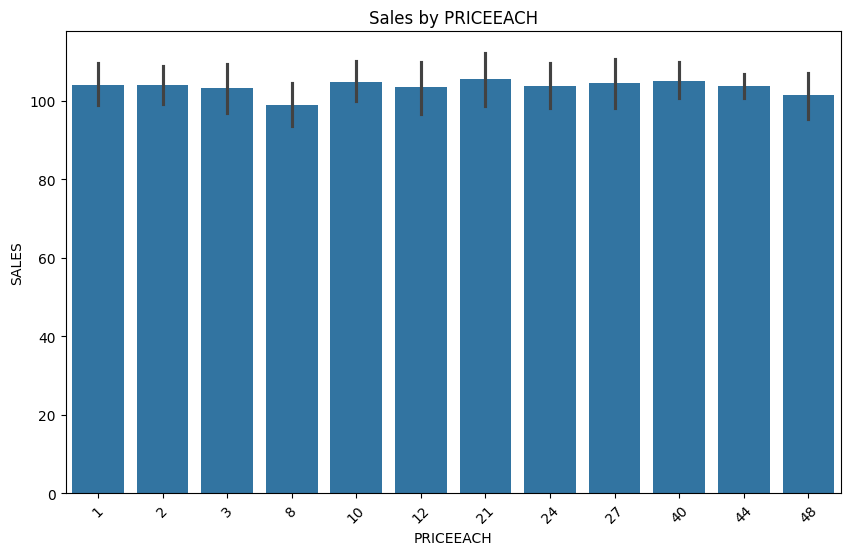

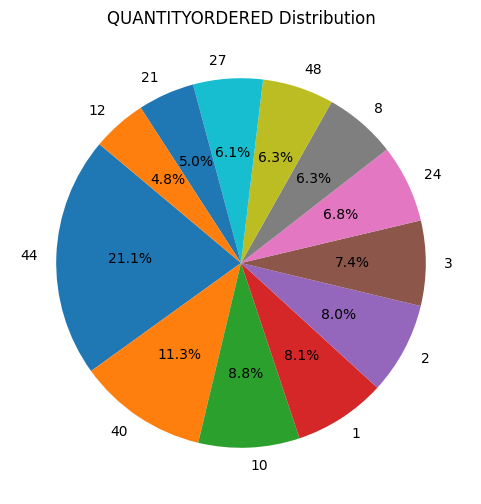

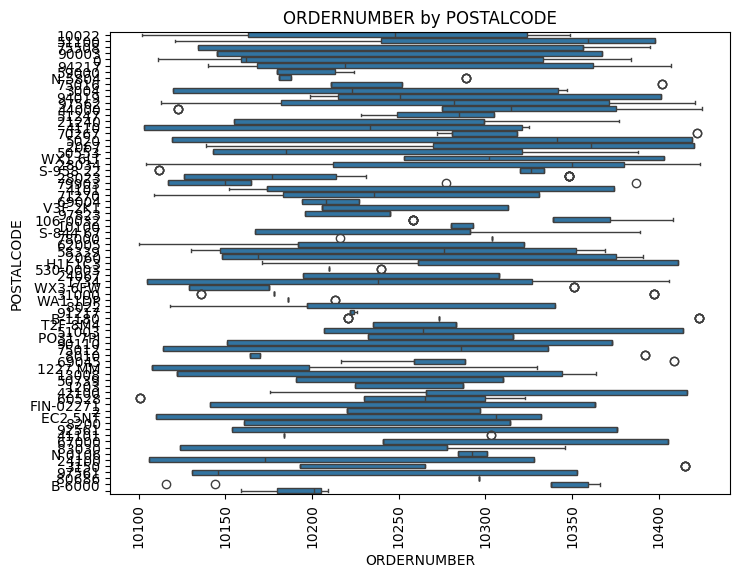

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot to represent sales by priceeach category
plt.figure(figsize=(10, 6))
sns.barplot(x='STATUS', y='MSRP', data=common_df)
plt.title('Sales by PRICEEACH')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.xticks(rotation=45)
plt.show()

# Create a pie chart to represent the distribution of quantity categories
QUANTITYORDERED = common_df['STATUS'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(QUANTITYORDERED, labels=QUANTITYORDERED.index, autopct='%1.1f%%', startangle=140)
plt.title('QUANTITYORDERED Distribution')
plt.show()

# Create a box plot to visualize the distribution of sales values
plt.figure(figsize=(8, 6))
sns.boxplot(x='ORDERNUMBER', y='POSTALCODE', data=common_df)
plt.title('ORDERNUMBER by POSTALCODE')
plt.xlabel('ORDERNUMBER')
plt.ylabel('POSTALCODE')
plt.xticks(rotation=90)
plt.show()